In [41]:
import pandas as pd

df = pd.read_csv('Boerschappen-Newdata-Box-Met-Events.csv')
df.head()

C:\Users\LAPTOP WORLD\AppData\Local\Temp\ipykernel_23220\3268525859.py:3: DtypeWarning:

Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.



customer_id             event      event_timestamp nextBox   
0        3329         new order  2023-03-15 16:18:54     NaN  \
1        3329  new subscription  2023-03-15 16:18:55     NaN   
2        3329         new order  2023-03-15 16:18:57     NaN   
3        3329         new order  2023-03-15 16:18:57     NaN   
4        3329         new order  2023-03-15 16:18:58     NaN   

  nextBoxDeliveryDate nextBoxDeliveryTime  currentBoxPrice currentBox   
0                 NaN                 NaN              NaN        NaN  \
1                 NaN                 NaN              NaN        NaN   
2                 NaN                 NaN              NaN        NaN   
3                 NaN                 NaN              NaN        NaN   
4                 NaN                 NaN              NaN        NaN   

  currentBoxDeliveryDate currentBoxDeliveryTime  ... prevBoxDeliveryType   
0                    NaN                    NaN  ...                 NaN  \
1                    NaN                    NaN  ...                 NaN   
2                    NaN                    NaN  ...                 NaN   
3                    NaN                    NaN  ...                 NaN   
4                    NaN                    NaN  ...                 NaN   

  prevBoxStatus  prevBoxStatusReason  prevOrderStatus  currentBoxDeliveryType   
0           NaN                  NaN              NaN                     NaN  \
1           NaN                  NaN              NaN                     NaN   
2           NaN                  NaN              NaN                     NaN   
3           NaN                  NaN              NaN                     NaN   
4           NaN                  NaN              NaN                     NaN   

   currentOrderStatus  nextBoxDeliveryType  nextBoxStatus   
0                 NaN                  NaN            NaN  \
1                 NaN                  NaN            NaN   
2                 NaN                  NaN            NaN   
3                 NaN                  NaN            NaN   
4                 NaN                  NaN            NaN   

   nextBoxStatusReason  nextOrderStatus  
0                  NaN              NaN  
1                  NaN              NaN  
2                  NaN              NaN  
3                  NaN              NaN  
4                  NaN              NaN  

[5 rows x 26 columns]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119659 entries, 0 to 119658
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             119659 non-null  object 
 1   event                   119659 non-null  object 
 2   event_timestamp         119659 non-null  object 
 3   nextBox                 118081 non-null  object 
 4   nextBoxDeliveryDate     118139 non-null  object 
 5   nextBoxDeliveryTime     118081 non-null  object 
 6   currentBoxPrice         118731 non-null  float64
 7   currentBox              118731 non-null  object 
 8   currentBoxDeliveryDate  118754 non-null  object 
 9   currentBoxDeliveryTime  118731 non-null  object 
 10  currentBoxStatus        119659 non-null  object 
 11  currentBoxStatusReason  7850 non-null    object 
 12  subscription_id         0 non-null       float64
 13  prevBox                 0 non-null       float64
 14  prevBoxDeliveryDate 

In [43]:
df = df.iloc[:,:11]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119659 entries, 0 to 119658
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             119659 non-null  object 
 1   event                   119659 non-null  object 
 2   event_timestamp         119659 non-null  object 
 3   nextBox                 118081 non-null  object 
 4   nextBoxDeliveryDate     118139 non-null  object 
 5   nextBoxDeliveryTime     118081 non-null  object 
 6   currentBoxPrice         118731 non-null  float64
 7   currentBox              118731 non-null  object 
 8   currentBoxDeliveryDate  118754 non-null  object 
 9   currentBoxDeliveryTime  118731 non-null  object 
 10  currentBoxStatus        119659 non-null  object 
dtypes: float64(1), object(10)
memory usage: 10.0+ MB


In [44]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['event_date'] = pd.to_datetime(df['event_timestamp'].dt.date)
df = df.sort_values(['customer_id', 'event_timestamp'])
df['last_event'] = df.groupby('customer_id')['event'].shift(1)
df['last_event_date'] = pd.to_datetime(df.groupby('customer_id')['event_date'].shift(1))
df['time_since_last_event'] = df['event_date'] - df['last_event_date']
df['time_since_last_event'] = df['time_since_last_event'].dt.days
df.head()

customer_id      event     event_timestamp         nextBox   
704            1  new order 2023-01-13 02:00:07        Fruittas  \
729            1  new order 2023-01-13 02:00:07        Fruittas   
9810           1  new order 2023-01-13 02:00:07  Gemaksbox - 3p   
9813           1  new order 2023-01-13 02:00:07  Gemaksbox - 3p   
773            1  new order 2023-01-20 02:00:06        Fruittas   

     nextBoxDeliveryDate nextBoxDeliveryTime  currentBoxPrice      currentBox   
704           2023-01-16       16:00 - 20:00            12.50        Fruittas  \
729           2023-01-16       16:00 - 20:00            12.50        Fruittas   
9810          2023-01-16       16:00 - 20:00            56.65  Gemaksbox - 3p   
9813          2023-01-16       16:00 - 20:00            56.65  Gemaksbox - 3p   
773           2023-01-23       16:00 - 20:00            12.50        Fruittas   

     currentBoxDeliveryDate currentBoxDeliveryTime currentBoxStatus   
704              2023-01-09          16:00 - 20:00                1  \
729              2023-01-09          16:00 - 20:00                1   
9810             2023-01-09          16:00 - 20:00                1   
9813             2023-01-09          16:00 - 20:00                1   
773              2023-01-16          16:00 - 20:00                1   

     event_date last_event last_event_date  time_since_last_event  
704  2023-01-13        NaN             NaT                    NaN  
729  2023-01-13  new order      2023-01-13                    0.0  
9810 2023-01-13  new order      2023-01-13                    0.0  
9813 2023-01-13  new order      2023-01-13                    0.0  
773  2023-01-20  new order      2023-01-13                    7.0

<Axes: xlabel='event'>

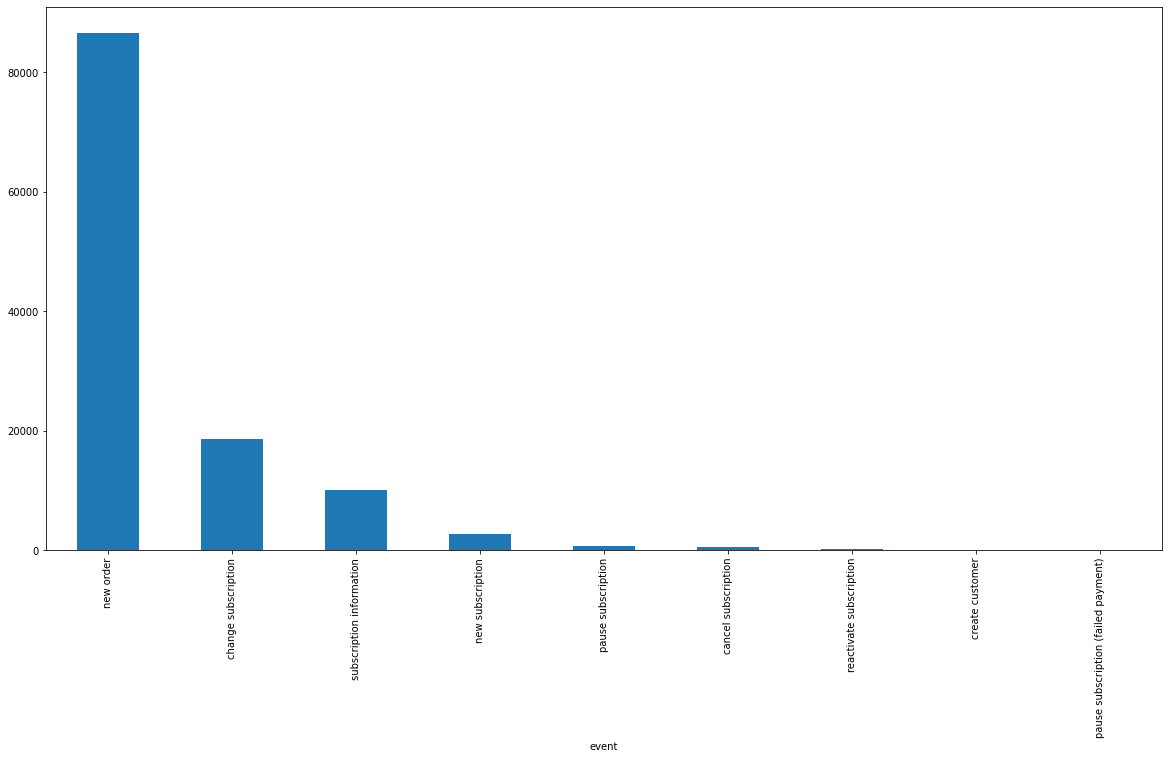

In [45]:
df['event'].value_counts().plot(kind='bar',figsize=(20,10))

In [46]:
len(df[df.event == 'create customer'])

110

<Axes: xlabel='time_since_last_event'>

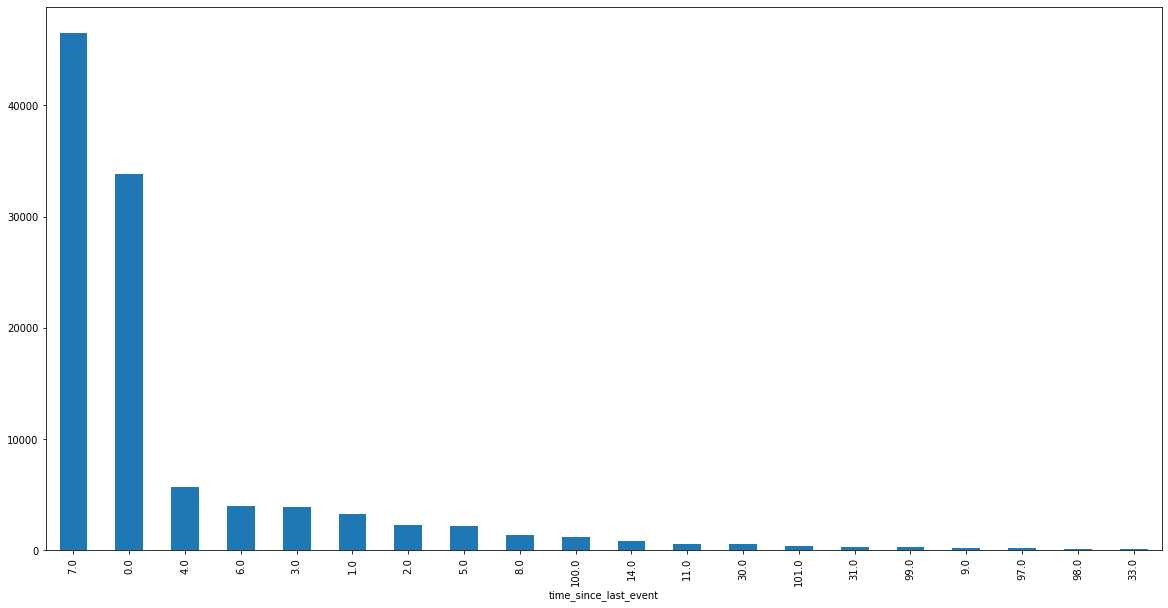

In [47]:
df['time_since_last_event'].value_counts().head(20).plot(kind='bar',figsize=(20,10))

In [48]:
df.tail()

customer_id      event     event_timestamp   
55988  e6b1d9354c5f4f5aa87bd9cd7cd3f8fb  new order 2022-09-19 01:00:36  \
48248  f6543325fc5142b69ff3a6b7410c8634  new order 2022-09-15 01:00:42   
48278  f6543325fc5142b69ff3a6b7410c8634  new order 2022-09-15 01:00:42   
48249  f6543325fc5142b69ff3a6b7410c8634  new order 2022-09-22 01:00:18   
48279  f6543325fc5142b69ff3a6b7410c8634  new order 2022-09-22 01:00:18   

                              nextBox nextBoxDeliveryDate nextBoxDeliveryTime   
55988  DEV - Gemaksbox 2 persoons box          2022-09-26       16:00 - 20:00  \
48248     Compleet Box 3 persoons box          2022-09-20       11:00 - 12:00   
48278                        Fruittas          2022-09-19       15:00 - 20:00   
48249     Compleet Box 3 persoons box          2022-09-27       11:00 - 12:00   
48279                        Fruittas          2022-09-26       15:00 - 20:00   

       currentBoxPrice                      currentBox currentBoxDeliveryDate   
55988             41.9  DEV - Gemaksbox 2 persoons box             2022-09-19  \
48248             55.9     Compleet Box 3 persoons box             2022-09-13   
48278             16.5                        Fruittas             2022-09-12   
48249             55.9     Compleet Box 3 persoons box             2022-09-20   
48279             16.5                        Fruittas             2022-09-19   

      currentBoxDeliveryTime currentBoxStatus event_date last_event   
55988          16:00 - 20:00                1 2022-09-19  new order  \
48248          11:00 - 12:00                1 2022-09-15        NaN   
48278          15:00 - 20:00                1 2022-09-15  new order   
48249          11:00 - 12:00                1 2022-09-22  new order   
48279          15:00 - 20:00                1 2022-09-22  new order   

      last_event_date  time_since_last_event  
55988      2022-09-13                    6.0  
48248             NaT                    NaN  
48278      2022-09-15                    0.0  
48249      2022-09-15                    7.0  
48279      2022-09-22                    0.0

<Axes: >

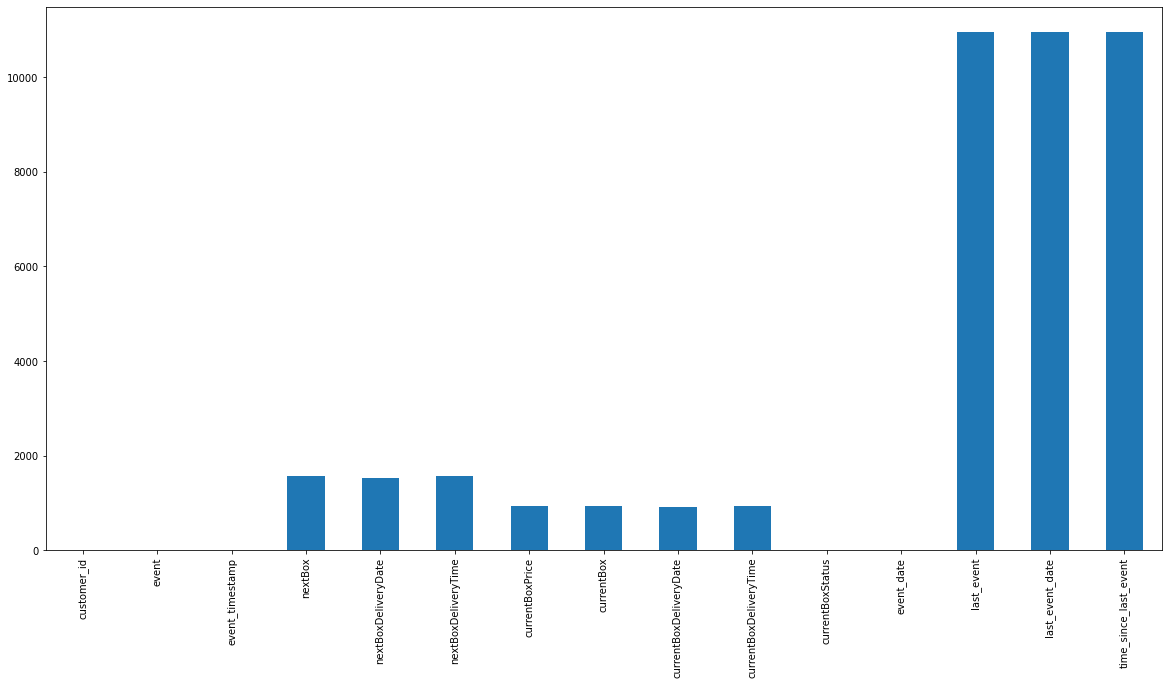

In [49]:
df.isna().sum().plot(kind='bar',figsize=(20,10))

In [50]:
df.dropna(inplace=True)

<Axes: >

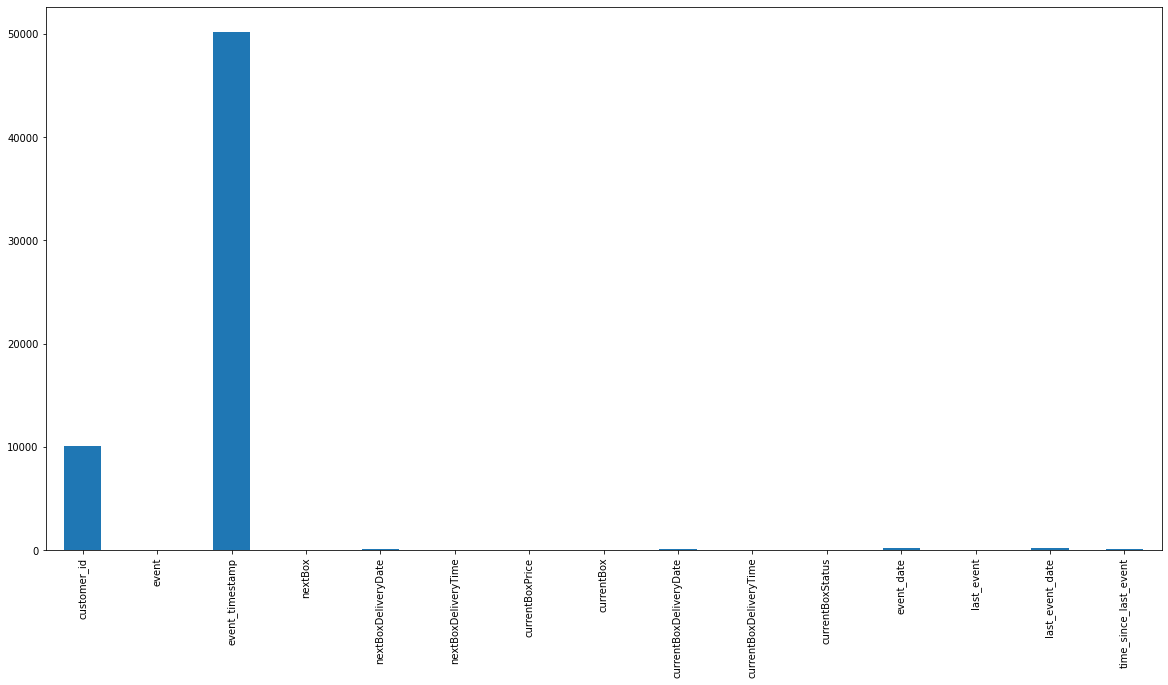

In [51]:
df.nunique().plot(kind='bar',figsize=(20,10))

In [52]:
df.event.value_counts()

event
new order                              77800
change subscription                    16943
subscription information                9369
new subscription                        2338
pause subscription                       589
cancel subscription                      485
reactivate subscription                  227
create customer                           87
pause subscription (failed payment)       28
Name: count, dtype: int64

<Axes: xlabel='event'>

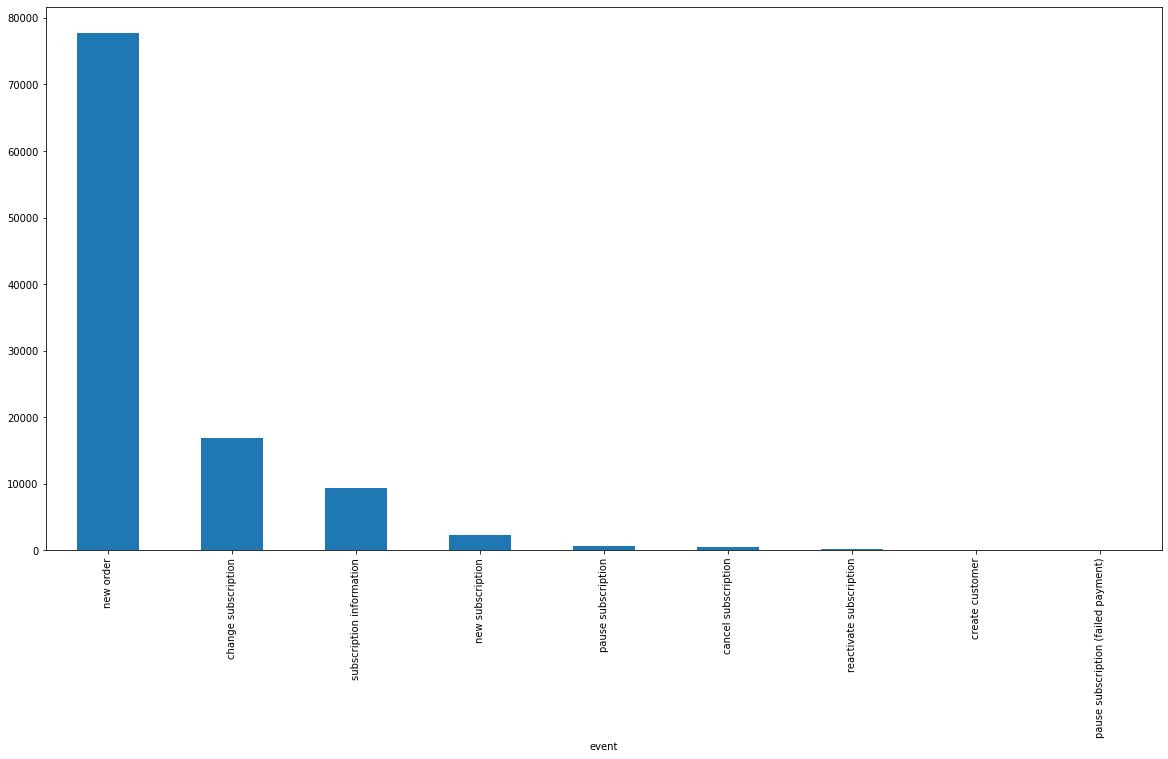

In [53]:
df.event.value_counts().plot(kind='bar',figsize=(20,10))

In [54]:
df.head()

customer_id      event     event_timestamp         nextBox   
729            1  new order 2023-01-13 02:00:07        Fruittas  \
9810           1  new order 2023-01-13 02:00:07  Gemaksbox - 3p   
9813           1  new order 2023-01-13 02:00:07  Gemaksbox - 3p   
773            1  new order 2023-01-20 02:00:06        Fruittas   
800            1  new order 2023-01-20 02:00:06        Fruittas   

     nextBoxDeliveryDate nextBoxDeliveryTime  currentBoxPrice      currentBox   
729           2023-01-16       16:00 - 20:00            12.50        Fruittas  \
9810          2023-01-16       16:00 - 20:00            56.65  Gemaksbox - 3p   
9813          2023-01-16       16:00 - 20:00            56.65  Gemaksbox - 3p   
773           2023-01-23       16:00 - 20:00            12.50        Fruittas   
800           2023-01-23       16:00 - 20:00            12.50        Fruittas   

     currentBoxDeliveryDate currentBoxDeliveryTime currentBoxStatus   
729              2023-01-09          16:00 - 20:00                1  \
9810             2023-01-09          16:00 - 20:00                1   
9813             2023-01-09          16:00 - 20:00                1   
773              2023-01-16          16:00 - 20:00                1   
800              2023-01-16          16:00 - 20:00                1   

     event_date last_event last_event_date  time_since_last_event  
729  2023-01-13  new order      2023-01-13                    0.0  
9810 2023-01-13  new order      2023-01-13                    0.0  
9813 2023-01-13  new order      2023-01-13                    0.0  
773  2023-01-20  new order      2023-01-13                    7.0  
800  2023-01-20  new order      2023-01-20                    0.0

In [55]:
import plotly.express as px

px.histogram(df.time_since_last_event)

In [56]:
df = df[df.time_since_last_event <= 30]
px.histogram(df.time_since_last_event)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104767 entries, 729 to 48279
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             104767 non-null  object        
 1   event                   104767 non-null  object        
 2   event_timestamp         104767 non-null  datetime64[ns]
 3   nextBox                 104767 non-null  object        
 4   nextBoxDeliveryDate     104767 non-null  object        
 5   nextBoxDeliveryTime     104767 non-null  object        
 6   currentBoxPrice         104767 non-null  float64       
 7   currentBox              104767 non-null  object        
 8   currentBoxDeliveryDate  104767 non-null  object        
 9   currentBoxDeliveryTime  104767 non-null  object        
 10  currentBoxStatus        104767 non-null  object        
 11  event_date              104767 non-null  datetime64[ns]
 12  last_event              104767 non

In [58]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'df' with a column named 'category' that you want to encode

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
cat_cols = [cat for cat in df.columns if df[cat].dtype == 'object' and cat != 'customer_id']
df_ = df.copy()
for cat in cat_cols:
# Fit the encoder on the 'category' column
    label_encoder.fit(df[cat].astype(str))

    # Encode the 'category' column

    df_[cat] = label_encoder.transform(df_[cat].astype(str))

<Axes: >

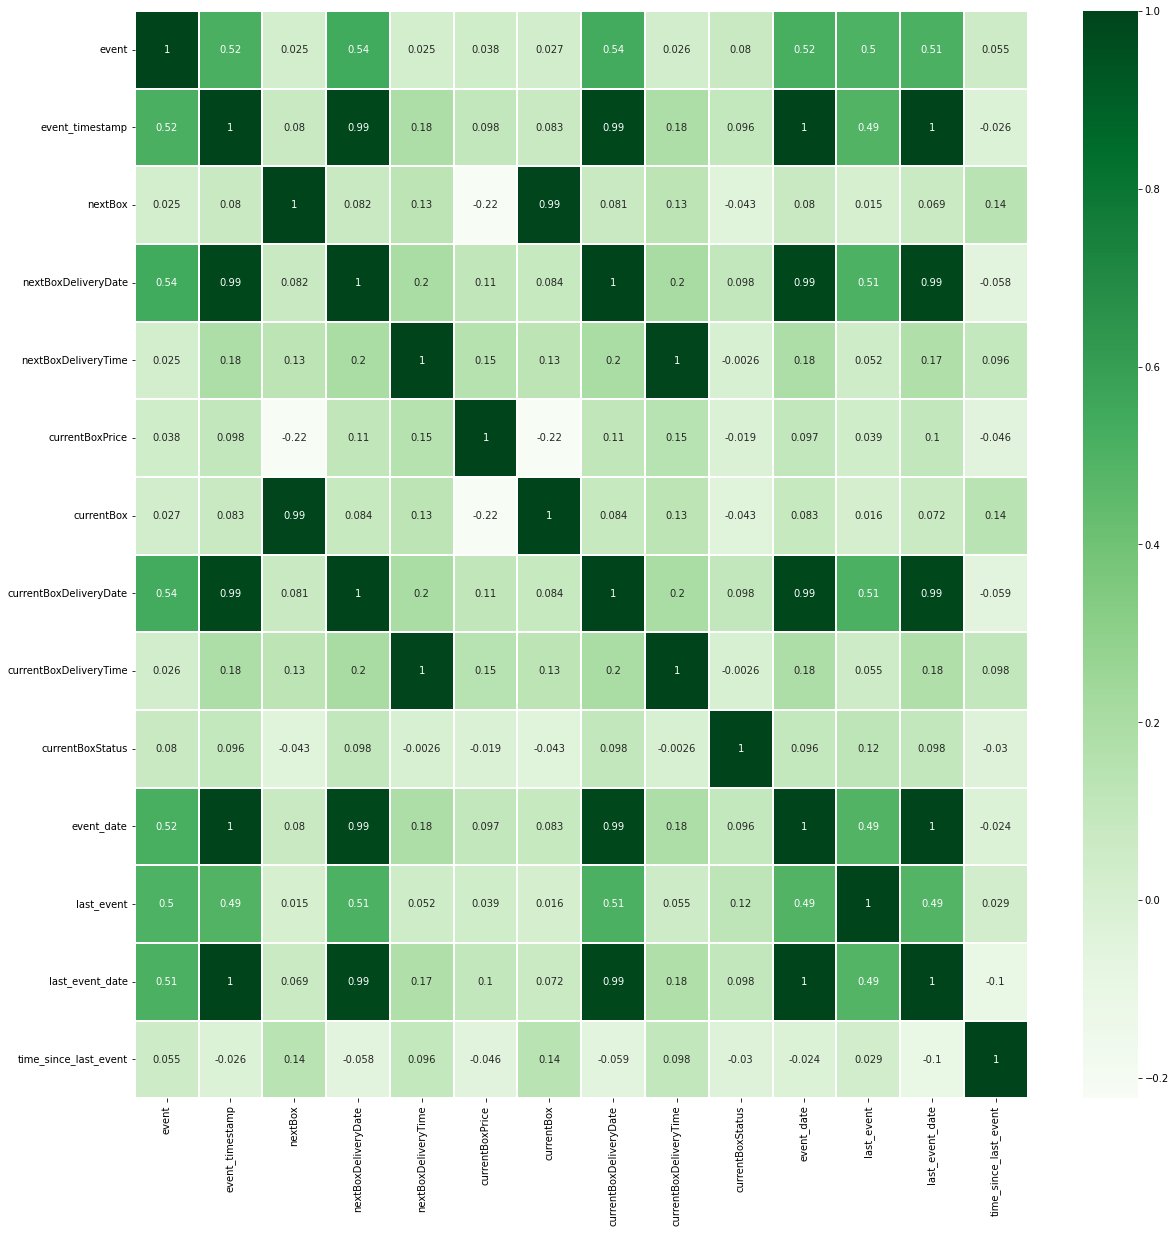

In [59]:
import MAna as ma

ma.heatmap(df_.iloc[:,1:],figsize=(20,20))

In [60]:
df.to_csv('preparedData.csv',index=False)

In [61]:
df.customer_id.nunique()

10062

In [62]:
df

customer_id            event     event_timestamp   
729                                   1        new order 2023-01-13 02:00:07  \
9810                                  1        new order 2023-01-13 02:00:07   
9813                                  1        new order 2023-01-13 02:00:07   
773                                   1        new order 2023-01-20 02:00:06   
800                                   1        new order 2023-01-20 02:00:06   
...                                 ...              ...                 ...   
48743  d7daadc4cf174d81b3b83730fc5a2e0f  create customer 2022-09-26 12:54:11   
55988  e6b1d9354c5f4f5aa87bd9cd7cd3f8fb        new order 2022-09-19 01:00:36   
48278  f6543325fc5142b69ff3a6b7410c8634        new order 2022-09-15 01:00:42   
48249  f6543325fc5142b69ff3a6b7410c8634        new order 2022-09-22 01:00:18   
48279  f6543325fc5142b69ff3a6b7410c8634        new order 2022-09-22 01:00:18   

                              nextBox nextBoxDeliveryDate nextBoxDeliveryTime   
729                          Fruittas          2023-01-16       16:00 - 20:00  \
9810                   Gemaksbox - 3p          2023-01-16       16:00 - 20:00   
9813                   Gemaksbox - 3p          2023-01-16       16:00 - 20:00   
773                          Fruittas          2023-01-23       16:00 - 20:00   
800                          Fruittas          2023-01-23       16:00 - 20:00   
...                               ...                 ...                 ...   
48743               Compleet box - 1p          2022-10-04       15:00 - 20:00   
55988  DEV - Gemaksbox 2 persoons box          2022-09-26       16:00 - 20:00   
48278                        Fruittas          2022-09-19       15:00 - 20:00   
48249     Compleet Box 3 persoons box          2022-09-27       11:00 - 12:00   
48279                        Fruittas          2022-09-26       15:00 - 20:00   

       currentBoxPrice                      currentBox currentBoxDeliveryDate   
729              12.50                        Fruittas             2023-01-09  \
9810             56.65                  Gemaksbox - 3p             2023-01-09   
9813             56.65                  Gemaksbox - 3p             2023-01-09   
773              12.50                        Fruittas             2023-01-16   
800              12.50                        Fruittas             2023-01-16   
...                ...                             ...                    ...   
48743            25.50               Compleet box - 1p             2022-09-27   
55988            41.90  DEV - Gemaksbox 2 persoons box             2022-09-19   
48278            16.50                        Fruittas             2022-09-12   
48249            55.90     Compleet Box 3 persoons box             2022-09-20   
48279            16.50                        Fruittas             2022-09-19   

      currentBoxDeliveryTime currentBoxStatus event_date       last_event   
729            16:00 - 20:00                1 2023-01-13        new order  \
9810           16:00 - 20:00                1 2023-01-13        new order   
9813           16:00 - 20:00                1 2023-01-13        new order   
773            16:00 - 20:00                1 2023-01-20        new order   
800            16:00 - 20:00                1 2023-01-20        new order   
...                      ...              ...        ...              ...   
48743          15:00 - 20:00                1 2022-09-26  create customer   
55988          16:00 - 20:00                1 2022-09-19        new order   
48278          15:00 - 20:00                1 2022-09-15        new order   
48249          11:00 - 12:00                1 2022-09-22        new order   
48279          15:00 - 20:00                1 2022-09-22        new order   

      last_event_date  time_since_last_event  
729        2023-01-13                    0.0  
9810       2023-01-13                    0.0  
9813       2023-01-13                    0.0  
773     

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104767 entries, 729 to 48279
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             104767 non-null  object        
 1   event                   104767 non-null  object        
 2   event_timestamp         104767 non-null  datetime64[ns]
 3   nextBox                 104767 non-null  object        
 4   nextBoxDeliveryDate     104767 non-null  object        
 5   nextBoxDeliveryTime     104767 non-null  object        
 6   currentBoxPrice         104767 non-null  float64       
 7   currentBox              104767 non-null  object        
 8   currentBoxDeliveryDate  104767 non-null  object        
 9   currentBoxDeliveryTime  104767 non-null  object        
 10  currentBoxStatus        104767 non-null  object        
 11  event_date              104767 non-null  datetime64[ns]
 12  last_event              104767 non

In [64]:
df.event.unique()

array(['new order', 'subscription information', 'new subscription',
       'pause subscription', 'cancel subscription',
       'reactivate subscription', 'pause subscription (failed payment)',
       'change subscription', 'create customer'], dtype=object)

In [65]:
_df = df.iloc[:,:2].groupby(['customer_id','event']).size().reset_index()

In [66]:
_df

customer_id                     event   0
0                                     1                 new order  39
1                                     1  subscription information   2
2                                     6                 new order  12
3                                     6          new subscription   4
4                                     6  subscription information   1
...                                 ...                       ...  ..
20240  d7daadc4cf174d81b3b83730fc5a2e0f       change subscription   4
20241  d7daadc4cf174d81b3b83730fc5a2e0f           create customer   7
20242  d7daadc4cf174d81b3b83730fc5a2e0f          new subscription  10
20243  e6b1d9354c5f4f5aa87bd9cd7cd3f8fb                 new order   1
20244  f6543325fc5142b69ff3a6b7410c8634                 new order   3

[20245 rows x 3 columns]

In [67]:
events_count_df = pd.DataFrame(columns=['customer_id','new order', 'subscription information', 'new subscription', 'create customer','pause subscription', 'cancel subscription', 'pause subscription (failed payment)','change subscription','reactivate subscription'])

for idx, row in _df.iterrows():
    if row.customer_id not in events_count_df.customer_id:
        events_count_df.loc[len(events_count_df), 'customer_id'] = row.customer_id
    events_count_df[row.event][events_count_df.customer_id == row.customer_id] = row[0]

events_count_df

customer_id new order subscription information   
0                                     1        39                        2  \
1                                     1       NaN                        2   
2                                     6        12                        1   
3                                     6       NaN                        1   
4                                     6       NaN                        1   
...                                 ...       ...                      ...   
18426  d7daadc4cf174d81b3b83730fc5a2e0f       NaN                      NaN   
18427  d7daadc4cf174d81b3b83730fc5a2e0f       NaN                      NaN   
18428  d7daadc4cf174d81b3b83730fc5a2e0f       NaN                      NaN   
18429  e6b1d9354c5f4f5aa87bd9cd7cd3f8fb         1                      NaN   
18430  f6543325fc5142b69ff3a6b7410c8634         3                      NaN   

      new subscription create customer pause subscription cancel subscription   
0                  NaN             NaN                NaN                 NaN  \
1                  NaN             NaN                NaN                 NaN   
2                    4             NaN                NaN                 NaN   
3                    4             NaN                NaN                 NaN   
4                  NaN             NaN                NaN                 NaN   
...                ...             ...                ...                 ...   
18426               10               7                NaN                 NaN   
18427               10               7                NaN                 NaN   
18428               10             NaN                NaN                 NaN   
18429              NaN             NaN                NaN                 NaN   
18430              NaN             NaN                NaN                 NaN   

      pause subscription (failed payment) change subscription   
0                                     NaN                 NaN  \
1                                     NaN                 NaN   
2                                     NaN                 NaN   
3                                     NaN                 NaN   
4                                     NaN                 NaN   
...                                   ...                 ...   
18426                                 NaN                   4   
18427                                 NaN                 NaN   
18428                                 NaN                 NaN   
18429                                 NaN                 NaN   
18430                                 NaN                 NaN   

      reactivate subscription  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
...                       ...  
18426                     NaN  
18427                     NaN  
18428                     NaN  
18429                     NaN  
18430                     NaN  

[18431 rows x 10 columns]

In [68]:
events_count_df.fillna(0,inplace=True)
events_count_df.tail(20)

customer_id  new order  subscription information   
18411                               997          2                         0  \
18412                               997          2                         0   
18413                               997          0                         0   
18414                               998          5                         0   
18415                               998          5                         0   
18416                               999          6                         1   
18417                               999          0                         1   
18418  aaba190ce13d48cc9ba99141e97a4f0c        301                         0   
18419  aaba190ce13d48cc9ba99141e97a4f0c        301                         0   
18420  aaba190ce13d48cc9ba99141e97a4f0c          0                         0   
18421  b40fcc6800fc44c58ce65c7bdac00f03          1                         0   
18422  b710a54f665f4c94bbb5325f00a4b2dd          4                         0   
18423  b710a54f665f4c94bbb5325f00a4b2dd          0                         0   
18424  c8305d1dba4d4b70a0772d41ddb5d60e          3                         0   
18425  cdf19f95c2844259bd417ec2717ea8ae          0                         0   
18426  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   
18427  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   
18428  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   
18429  e6b1d9354c5f4f5aa87bd9cd7cd3f8fb          1                         0   
18430  f6543325fc5142b69ff3a6b7410c8634          3                         0   

       new subscription  create customer  pause subscription   
18411                 2                0                   0  \
18412                 2                0                   0   
18413                 2                0                   0   
18414                 0                0                   0   
18415                 0                0                   0   
18416                 0                0                   0   
18417                 0                0                   0   
18418                75                0                   0   
18419                75                0                   0   
18420                75                0                   0   
18421                 0                0                   0   
18422                 3                0                   0   
18423                 3                0                   0   
18424                 0                0                   0   
18425                 1                0                   0   
18426                10                7                   0   
18427                10                7                   0   
18428                10                0                   0   
18429                 0                0                   0   
18430                 0                0                   0   

       cancel subscription  pause subscription (failed payment)   
18411                    0                                    0  \
18412                    0                                    0   
18413                    0                                    0   
18414                    0                                    0   
18415                    0                                    0   
18416                    0                                    0   
18417                    0                                    0   
18418                    0                                    0   
18419                    0                                    0   
18420                    0                                    0   
18421                    0                                    0   
18422                    0                                    0   
18423                    0                                    0   
18424                    0                                    0 

In [69]:
df.columns

Index(['customer_id', 'event', 'event_timestamp', 'nextBox',
       'nextBoxDeliveryDate', 'nextBoxDeliveryTime', 'currentBoxPrice',
       'currentBox', 'currentBoxDeliveryDate', 'currentBoxDeliveryTime',
       'currentBoxStatus', 'event_date', 'last_event', 'last_event_date',
       'time_since_last_event'],
      dtype='object')

In [70]:
df[df.event=='cancel subscription'].tail()

customer_id                event     event_timestamp   
33146         848  cancel subscription 2023-01-13 15:50:33  \
43101         920  cancel subscription 2023-02-28 10:42:38   
97496         984  cancel subscription 2023-03-29 12:07:16   
97501         984  cancel subscription 2023-03-29 12:07:16   
97502         984  cancel subscription 2023-03-29 12:07:24   

                      nextBox nextBoxDeliveryDate nextBoxDeliveryTime   
33146   Seizoensbox Vega - 2p          2023-01-19       17:00 - 22:00  \
43101  Seizoensbox Vegan - 2p          2023-03-08       18:30 - 19:30   
97496                Fruittas          2023-04-12       16:00 - 18:00   
97501   Seizoensbox Vega - 2p          2023-04-12       16:00 - 18:00   
97502   Seizoensbox Vega - 2p          2023-04-12       16:00 - 18:00   

       currentBoxPrice              currentBox currentBoxDeliveryDate   
33146             25.9   Seizoensbox Vega - 2p             2023-01-12  \
43101             28.9  Seizoensbox Vegan - 2p             2023-03-01   
97496             12.5                Fruittas             2023-04-05   
97501             27.2   Seizoensbox Vega - 2p             2023-04-05   
97502             27.2   Seizoensbox Vega - 2p             2023-04-05   

      currentBoxDeliveryTime currentBoxStatus event_date           last_event   
33146          17:00 - 22:00                3 2023-01-13            new order  \
43101          18:30 - 19:30                3 2023-02-28            new order   
97496          16:00 - 18:00                1 2023-03-29            new order   
97501          16:00 - 18:00                1 2023-03-29  cancel subscription   
97502          16:00 - 18:00                1 2023-03-29  cancel subscription   

      last_event_date  time_since_last_event  
33146      2022-12-16                   28.0  
43101      2023-02-26                    2.0  
97496      2023-03-26                    3.0  
97501      2023-03-29                    0.0  
97502      2023-03-29                    0.0

In [71]:
imp_cols = ['customer_id','event','nextBox',
        'nextBoxDeliveryTime', 'currentBoxPrice',
       'currentBox', 'currentBoxDeliveryTime',
       'currentBoxStatus','last_event','time_since_last_event']

imp_acts_df = df[imp_cols][df.event.isin(['pause subscription', 'cancel subscription', 'pause subscription (failed payment)','change subscription','reactivate subscription','create customer', 'new subscription'])]
imp_acts_df.head()

customer_id               event              nextBox   
26591           6    new subscription  Gemaksbox Vega - 2p  \
161             6    new subscription             Appelsap   
163             6    new subscription             Appelsap   
26609           6    new subscription  Gemaksbox Vega - 2p   
407             8  pause subscription             Fruittas   

      nextBoxDeliveryTime  currentBoxPrice           currentBox   
26591       17:00 - 19:00             41.9  Gemaksbox Vega - 2p  \
161         16:00 - 18:30             35.2             Appelsap   
163         16:00 - 20:00             35.2             Appelsap   
26609       17:00 - 19:00             41.9  Gemaksbox Vega - 2p   
407         16:00 - 18:30             12.5             Fruittas   

      currentBoxDeliveryTime currentBoxStatus        last_event   
26591          17:00 - 19:00                1         new order  \
161            16:00 - 18:30                1         new order   
163            16:00 - 20:00                1  new subscription   
26609          17:00 - 19:00                1  new subscription   
407            16:00 - 18:30                2         new order   

       time_since_last_event  
26591                    0.0  
161                      0.0  
163                      0.0  
26609                    0.0  
407                      3.0

In [72]:
new_df = pd.merge(events_count_df,imp_acts_df,'right',on='customer_id')
new_df

customer_id  new order  subscription information   
0                                     6         12                         1  \
1                                     6          0                         1   
2                                     6          0                         1   
3                                     6         12                         1   
4                                     6          0                         1   
...                                 ...        ...                       ...   
52581  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   
52582  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   
52583  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   
52584  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   
52585  d7daadc4cf174d81b3b83730fc5a2e0f          0                         0   

       new subscription  create customer  pause subscription   
0                     4                0                   0  \
1                     4                0                   0   
2                     0                0                   0   
3                     4                0                   0   
4                     4                0                   0   
...                 ...              ...                 ...   
52581                10                7                   0   
52582                10                0                   0   
52583                10                7                   0   
52584                10                7                   0   
52585                10                0                   0   

       cancel subscription  pause subscription (failed payment)   
0                        0                                    0  \
1                        0                                    0   
2                        0                                    0   
3                        0                                    0   
4                        0                                    0   
...                    ...                                  ...   
52581                    0                                    0   
52582                    0                                    0   
52583                    0                                    0   
52584                    0                                    0   
52585                    0                                    0   

       change subscription  reactivate subscription             event   
0                        0                        0  new subscription  \
1                        0                        0  new subscription   
2                        0                        0  new subscription   
3                        0                        0  new subscription   
4                        0                        0  new subscription   
...                    ...                      ...               ...   
52581                    0                        0   create customer   
52582                    0                        0   create customer   
52583                    4                        0   create customer   
52584                    0                        0   create customer   
52585                    0                        0   create customer   

                   nextBox nextBoxDeliveryTime  currentBoxPrice   
0      Gemaksbox Vega - 2p       17:00 - 19:00             41.9  \
1      Gemaksbox Vega - 2p       17:00 - 19:00             41.9   
2      Gemaksbox Vega - 2p       17:00 - 19:00             41.9   
3                 Appelsap       16:00 - 18:30             35.2   
4                 Appelsap       16:00 - 18:30             35.2   
...                    ...                 ...              ...   
52581       Gemaksbox - 2p       15:00 - 20:00             41.9   
52582       Gemaksbox - 2p       15:00 - 20:00             41.9   
52583    Comp

In [73]:
new_df.fillna(0,inplace=True)

In [74]:
new_df.to_csv('fully_prepared_df.csv',index=False)

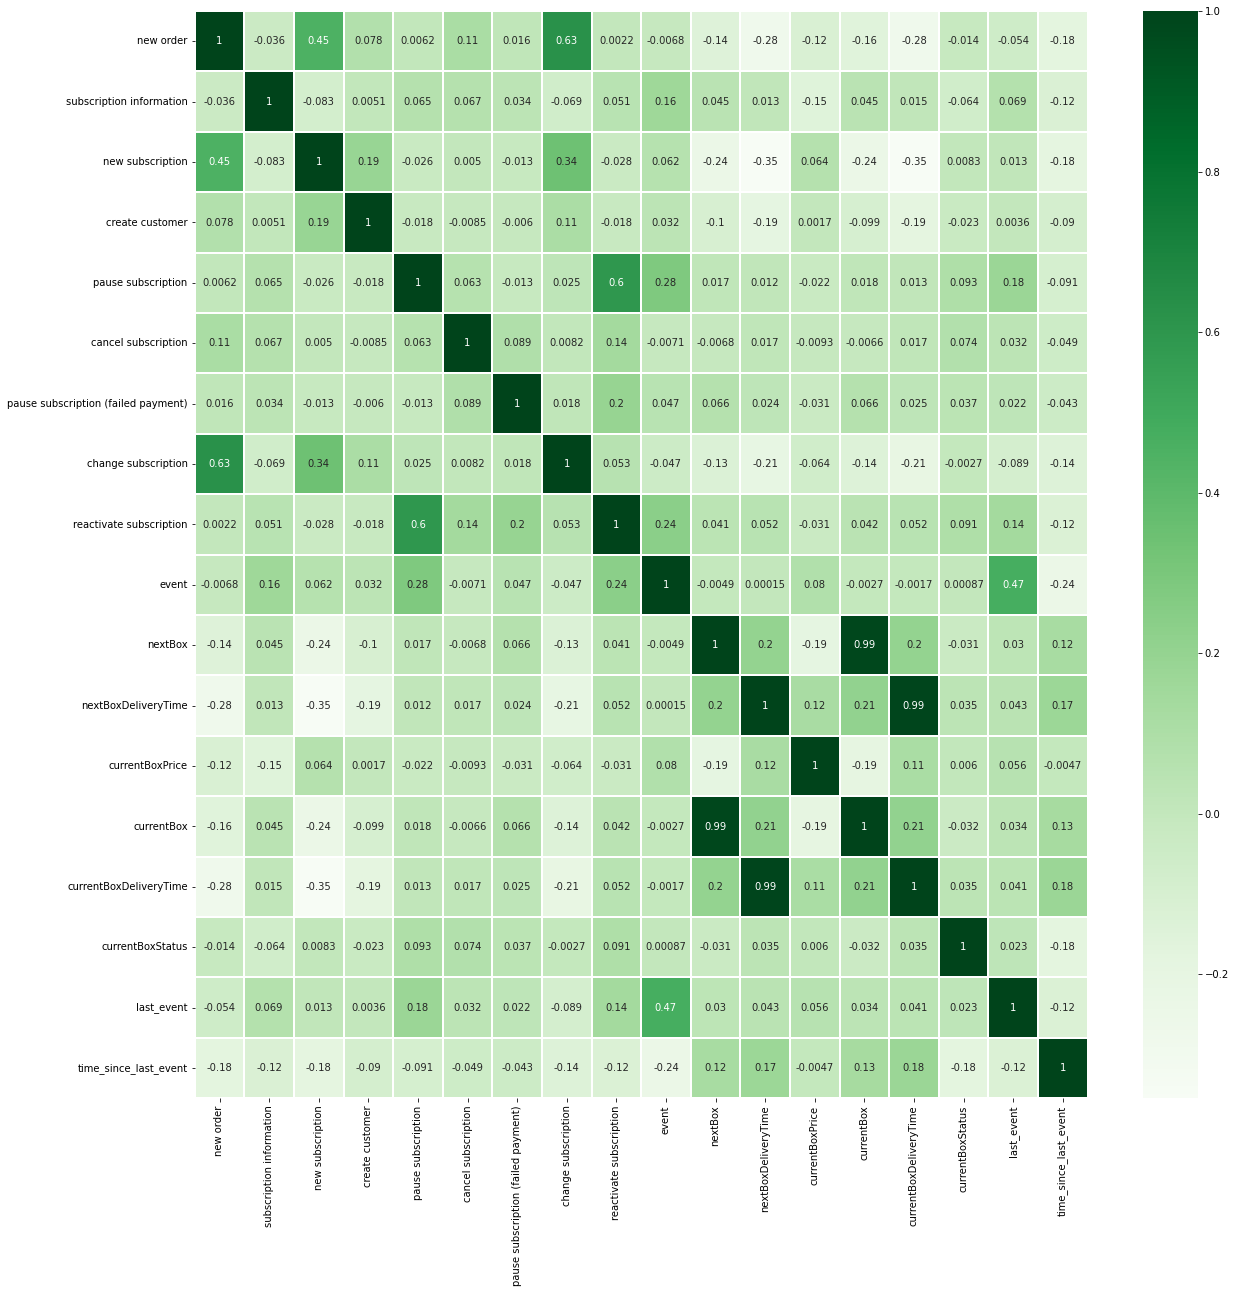

In [75]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'new_df' with a column named 'category' that you want to encode

# Initialize the LabelEncoder
label_encoders = {}
cat_cols = [cat for cat in new_df.columns if new_df[cat].dtype == 'object' and cat != 'customer_id']
new_df_ = new_df.copy()
for cat in cat_cols:
# Fit the encoder on the 'category' column
    label_encoders[cat] = LabelEncoder()
    label_encoders[cat].fit(new_df[cat].astype(str))

    # Encode the 'category' column

    new_df_[cat] = label_encoders[cat].transform(new_df_[cat].astype(str))

import MAna as ma

ma.heatmap(new_df_.iloc[:,1:],figsize=(20,20));

In [76]:
px.histogram(new_df_.time_since_last_event)

In [77]:
px.histogram(new_df_.event)

In [78]:
new_df_.to_csv('ready_to_model_df.csv',index=False)

import pickle

# Specify the file path to save the dictionary
file_path = 'label_encoders.pkl'

# Open the file in binary write mode
with open(file_path, 'wb') as file:
    # Dump the dictionary object into the file
    pickle.dump(label_encoders, file)